<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" heiht= 250 width= 250 alt=" ">  

|Fecha|Email|
|-----|-----|
|24 de abril 2020|luishernandezmatos@yahoo.com

**Descripción:**  
Análisis de Texto 

# Ejercicio dataset yelp.csv 

### librerias a utilizar 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


###  Task 1: cargar la data en un dataframe

In [2]:
yelp = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [39]:
yelp.shape

(10000, 10)

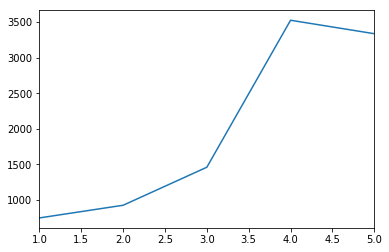

In [7]:
# verificar la cantidad de stars
%matplotlib inline
yelp.stars.value_counts().sort_index().plot()

In [10]:
yelp.stars.value_counts(normalize = True).sort_index()

1    0.0749
2    0.0927
3    0.1461
4    0.3526
5    0.3337
Name: stars, dtype: float64

### Task 2:
crear un nuevo dataframe que solo contengan 5 start and 1 start

In [11]:
yelp_best_worst = yelp.loc[(yelp.stars ==5) | (yelp.stars==1), :]
yelp_best_worst.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [12]:
yelp_best_worst.shape

(4086, 10)

In [13]:
yelp_best_worst.stars.value_counts()

5    3337
1     749
Name: stars, dtype: int64

### Task 3: 
Define X , y- divide la data en entrenamiento y testeo

In [14]:
X = yelp_best_worst.text
y = yelp_best_worst.stars
X.shape , y.shape

((4086,), (4086,))

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=1)

### Vectorizar el vocabulario  

In [16]:
#vectorizardor
vect = CountVectorizer()

In [18]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<3064x16825 sparse matrix of type '<class 'numpy.int64'>'
	with 237720 stored elements in Compressed Sparse Row format>

In [19]:
X_test_dtm = vect.transform(X_test)

### Modelo NB multinomial 

In [23]:
nb= MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

Wall time: 31 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
y_nb = nb.predict(X_test_dtm)

In [24]:
#Score
metrics.accuracy_score(y_test, y_nb)

0.9187866927592955

In [25]:
print(metrics.classification_report(y_test, y_nb))

              precision    recall  f1-score   support

           1       0.83      0.68      0.75       184
           5       0.93      0.97      0.95       838

   micro avg       0.92      0.92      0.92      1022
   macro avg       0.88      0.83      0.85      1022
weighted avg       0.92      0.92      0.92      1022



In [26]:
#matriz de confusion
metrics.confusion_matrix(y_test, y_nb)

array([[126,  58],
       [ 25, 813]], dtype=int64)

In [30]:
#Falsos negativos
X_test[y_nb> y_test]

2175    This has to be the worst restaurant in terms o...
1781    If you like the stuck up Scottsdale vibe this ...
2674    I'm sorry to be what seems to be the lone one ...
9984    Went last night to Whore Foods to get basics t...
3392    I found Lisa G's while driving through phoenix...
8283    Don't know where I should start. Grand opening...
2765    Went last week, and ordered a dozen variety. I...
2839    Never Again,\nI brought my Mountain Bike in (w...
321     My wife and I live around the corner, hadn't e...
1919                                         D-scust-ing.
2490    Lazy Q CLOSED in 2010.  New Owners cleaned up ...
9125    La Grande Orange Grocery has a problem. It can...
9185    For frozen yogurt quality, I give this place a...
436     this another place that i would give no stars ...
2051    Sadly with new owners comes changes on menu.  ...
1721    This is the closest to a New York hipster styl...
3447    If you want a school that cares more about you...
842     Boy is

In [31]:
X_test[507]

'HELLISH HELLISH SUMMER WEATHER (March thru October)\nit hurts my lungs to breath.\n\nI couldn\'t get transcripts because I had a parking ticket I needed to pay.\nThe problem is... *i DON\'T OWN A CAR, I don\'t drive, I don\'t even have a drivers license*!!\n~*~*-- aside from that one minor incident,~*~*\n\nI paid 9000 USD a semester to receive a so and so education.\nI graduated with a magna cum laude. I have attended other universities. However, I couldn\'t help but notice the gap in the quality and variety of classes offered.\n\nFor example, you have to be a finance major to take upper level interesting finance classes.\n\nBusiness school was so and so, a lot of repetition.\nVery little hands-on and help with internships.\nWay too much groupwork and free-riding.\nThey do not have many good employers at their semi annual recruiting events.\n\nOh, and professors rarely teach the courses.\nThey have their teaching assistants teach us.\n\nAlso, there is a lack of bridging classes betwee

In [32]:
#Falsos positivos
X_test[y_nb< y_test]

7148    I now consider myself an Arizonian. If you dri...
4963    This is by far my favourite department store, ...
6318    Since I have ranted recently on poor customer ...
380     This is a must try for any Mani Pedi fan. I us...
5565    I`ve had work done by this shop a few times th...
3448    I was there last week with my sisters and whil...
6050    I went to sears today to check on a layaway th...
2504    I've passed by prestige nails in walmart 100s ...
2475    This place is so great! I am a nanny and had t...
241     I was sad to come back to lai lai's and they n...
3149    I was told to see Greg after a local shop diag...
423     These guys helped me out with my rear windshie...
763     Here's the deal. I said I was done with OT, bu...
8956    I took my computer to RedSeven recently when m...
750     This store has the most pleasant employees of ...
9765    You can't give anything less than 5 stars to a...
6334    I came here today for a manicure and pedicure....
1282    Loved 

In [33]:
X_test[402]

"Once again Wildflower proves why it's my favorite breakfast hangout! Jeff the Manager on staff today rocks! \n\nSome of us hangout at a restaurant to make it a working meal...and sometimes, during that time Nature calls...so I asked the busboy to not clear my table as I needed to step away for a moment and he cheerfully agreed. I came back to find my table cleared by new patrons who had taken it upon themselves to steal my table (I guess the fact that the food was only half eaten, and the water and coffee were still half filled were no clue). The busboy was upset that he'd turned his back for just a moment and Jeff came to the rescue...after apologizing to me and finding the perfect way to make it right, he vowed to let the new people know that they were rather um 'overly proactive' in clearing the table themselves and that he had some people who regularly relaxed and worked in the restaurant and do step away.\n\nHe handled the situation with me just right and I am sure that those peo

In [34]:
y_nb_prob = nb.predict_proba(X_test_dtm)
y_nb_prob

array([[6.21708191e-13, 1.00000000e+00],
       [2.40125920e-04, 9.99759874e-01],
       [2.04567380e-10, 1.00000000e+00],
       ...,
       [2.86600345e-13, 1.00000000e+00],
       [1.00000000e+00, 1.05200807e-19],
       [8.46839316e-05, 9.99915316e-01]])

In [37]:
y_test.value_counts(normalize=True)

5    0.819961
1    0.180039
Name: stars, dtype: float64

###  Vamos a realizar el modelo con todas los datos sin filtros

In [38]:
#features and response
X = yelp.text
y = yelp.stars
X.shape, y.shape

((10000,), (10000,))

In [40]:
#train,/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

In [42]:
# CountVetrizer
vect = CountVectorizer()

In [45]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<7500x25797 sparse matrix of type '<class 'numpy.int64'>'
	with 622700 stored elements in Compressed Sparse Row format>

In [46]:
X_test_dtm = vect.transform(X_test)

In [48]:
#modelo nb Mul
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

Wall time: 102 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
y_pred = nb.predict(X_test_dtm)

In [50]:
#accuracy
metrics.accuracy_score(y_test, y_pred)

0.4712

In [51]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.30      0.38       185
           2       0.39      0.07      0.12       234
           3       0.29      0.10      0.14       365
           4       0.43      0.71      0.53       884
           5       0.58      0.53      0.55       832

   micro avg       0.47      0.47      0.47      2500
   macro avg       0.45      0.34      0.35      2500
weighted avg       0.46      0.47      0.43      2500



In [53]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 55,  14,  24,  65,  27],
       [ 28,  16,  41, 122,  27],
       [  5,   7,  35, 281,  37],
       [  7,   0,  16, 629, 232],
       [  6,   4,   6, 373, 443]], dtype=int64)